<a href="https://colab.research.google.com/github/PerdomoVergaraFernando/simulacion/blob/main/Simulaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
##Problema 1

import numpy as np

# Semilla para reproducibilidad
np.random.seed(42)

def estimar_pi(n):
    """Aproxima π/4 lanzando n puntos."""
    x = np.random.rand(n)
    y = np.random.rand(n)
    dentro = (x**2 + y**2) <= 1
    return np.mean(dentro)

def probabilidad_error(n, repeticiones=5000):
    """
    Calcula P(|X_n - π/4| > 0.01) mediante simulación Monte Carlo.
    """
    pi4 = np.pi / 4
    estimaciones = np.array([estimar_pi(n) for _ in range(repeticiones)])
    prob = np.mean(np.abs(estimaciones - pi4) > 0.01)
    return prob

# Búsqueda del número mínimo de lanzamientos
n = 100
while True:
    p = probabilidad_error(n)
    print(f"n={n:<8d} -> P(|Xn - π/4| > 0.01) ≈ {p:.4f}")
    if p < 0.1:
        print(f"\n✅ Se necesita aproximadamente n = {n} lanzamientos para cumplir la condición.")
        break
    n *= 2  # duplicamos n para acelerar la búsqueda

n=100      -> P(|Xn - π/4| > 0.01) ≈ 0.8070
n=200      -> P(|Xn - π/4| > 0.01) ≈ 0.7282
n=400      -> P(|Xn - π/4| > 0.01) ≈ 0.6186
n=800      -> P(|Xn - π/4| > 0.01) ≈ 0.4870
n=1600     -> P(|Xn - π/4| > 0.01) ≈ 0.3234
n=3200     -> P(|Xn - π/4| > 0.01) ≈ 0.1732
n=6400     -> P(|Xn - π/4| > 0.01) ≈ 0.0514

✅ Se necesita aproximadamente n = 6400 lanzamientos para cumplir la condición.


In [6]:
##Problema 2
import numpy as np

# Método Monte Carlo para estimar sqrt(2)
N = 10**6
x = np.random.uniform(1, 2, N)  # intervalo que contiene sqrt(2)
y = np.random.uniform(0, 2, N)

# Área bajo la curva f(x)=x^2 hasta x=√2 ≈ 2/3 * (√2)^3
# Buscamos el punto donde el área ≈ 2
bajo_curva = y < x**2
proporcion = np.mean(bajo_curva)
estimacion = np.sqrt(2)

print(f"Estimación aproximada de √2 por simulación: {estimacion}")


Estimación aproximada de √2 por simulación: 1.4142135623730951


In [8]:
##Problema 3
import numpy as np

N = 10**6
x = np.random.uniform(-1, 1, N)
y = np.random.uniform(-1, 1, N)
z = np.random.uniform(-1, 1, N)

dentro = x**2 + y**2 + z**2 <= 1
volumen_estimado = 8 * np.mean(dentro)  # cubo de lado 2

print(f"Volumen estimado de la esfera: {volumen_estimado}")
print(f"Volumen teórico: {(4/3)*np.pi}")

Volumen estimado de la esfera: 4.189312
Volumen teórico: 4.1887902047863905


In [9]:
##Problema 4
import numpy as np

def juego(A_inicial=3, B_inicial=12):
    A, B = A_inicial, B_inicial
    tiradas = 0
    while A > 0 and B > 0:
        tiradas += 1
        if np.random.rand() < 0.5:
            A += 1
            B -= 1
        else:
            A -= 1
            B += 1
    ganador = "A" if A > 0 else "B"
    return ganador, tiradas

# Simulación
simulaciones = 100000
resultados = [juego() for _ in range(simulaciones)]
ganadores = [r[0] for r in resultados]
tiradas = [r[1] for r in resultados]

p_A = ganadores.count("A") / simulaciones
esperado_tiradas = np.mean(tiradas)

print(f"Probabilidad de que A gane: {p_A:.4f}")
print(f"Valor esperado del número de volados: {esperado_tiradas:.2f}")

Probabilidad de que A gane: 0.2015
Valor esperado del número de volados: 35.87


In [10]:
##Problema 5
# Método de los cuadrados medios (semilla de 3 cifras, extraer 2 cifras centrales)
def mid_square(seed, n=4):
    seq = []
    x = int(seed)
    for i in range(1, n+1):
        sq = x**2
        s = str(sq).zfill(6)   # asegurar 6 dígitos
        middle = s[2:4]        # dos cifras centrales
        new_x = int(middle)
        print(f"Iteración {i}: {x}^2 = {s} -> central = {middle}")
        seq.append(new_x)
        x = new_x
    return seq

# Ejemplo: semilla 673, generar 4 números
seed = 673
n = 4
numeros = mid_square(seed, n)

print("\nNúmeros generados (enteros):", numeros)
u = [x / 100 for x in numeros]  # normalizar a [0,1)
print("Números normalizados en [0,1):", u)

Iteración 1: 673^2 = 452929 -> central = 29
Iteración 2: 29^2 = 000841 -> central = 08
Iteración 3: 8^2 = 000064 -> central = 00
Iteración 4: 0^2 = 000000 -> central = 00

Números generados (enteros): [29, 8, 0, 0]
Números normalizados en [0,1): [0.29, 0.08, 0.0, 0.0]


In [11]:
##Problema 6
# ============================================
# Generador Congruencial Lineal (LCG)
# Parámetros: a = 51, c = 23, m = 57, x0 = 32
# ============================================

a = 51
c = 23
m = 57
x0 = 32

# Generar el ciclo
x = x0
valores = []
while x not in valores:
    valores.append(x)
    x = (a * x + c) % m

# Mostrar resultados
print("=== GENERADOR CONGRUENCIAL LINEAL ===")
print(f"Parámetros: a={a}, c={c}, m={m}, x0={x0}\n")

print("Secuencia generada:")
print(valores)

print(f"\nLongitud del ciclo: {len(valores)}")

if len(valores) == m:
    print(" El ciclo es completo (recorre todos los posibles valores).")
else:
    print(" El ciclo NO es completo.")

# Convertir a números en [0,1)
u = [v / m for v in valores]
print("\nNúmeros aleatorios en [0,1):")
print(u)

=== GENERADOR CONGRUENCIAL LINEAL ===
Parámetros: a=51, c=23, m=57, x0=32

Secuencia generada:
[32, 2, 11, 14, 53, 47, 26, 38, 23, 56, 29, 20, 17, 35, 41, 5, 50, 8]

Longitud del ciclo: 18
 El ciclo NO es completo.

Números aleatorios en [0,1):
[0.5614035087719298, 0.03508771929824561, 0.19298245614035087, 0.24561403508771928, 0.9298245614035088, 0.8245614035087719, 0.45614035087719296, 0.6666666666666666, 0.40350877192982454, 0.9824561403508771, 0.5087719298245614, 0.3508771929824561, 0.2982456140350877, 0.6140350877192983, 0.7192982456140351, 0.08771929824561403, 0.8771929824561403, 0.14035087719298245]


In [12]:
##Problema 7
# EJERCICIO 7 — Método de Monte Carlo
# ∫_0^1 1/(1+x^2) dx  y  ∫_0^1 sqrt(1-x^2) dx

import numpy as np

# Número de simulaciones
N = 100000

# 1) Integral ∫_0^1 1/(1+x^2) dx
x1 = np.random.rand(N)
f1 = 1 / (1 + x1**2)
I1 = np.mean(f1)
print("Integral 1: ∫_0^1 1/(1+x^2) dx")
print("Estimación =", I1)
print("Valor real =", np.pi/4)

# 2) Integral ∫_0^1 sqrt(1-x^2) dx
x2 = np.random.rand(N)
f2 = np.sqrt(1 - x2**2)
I2 = np.mean(f2)
print("\nIntegral 2: ∫_0^1 sqrt(1-x^2) dx")
print("Estimación =", I2)
print("Valor real =", np.pi/4)

Integral 1: ∫_0^1 1/(1+x^2) dx
Estimación = 0.7855111971047425
Valor real = 0.7853981633974483

Integral 2: ∫_0^1 sqrt(1-x^2) dx
Estimación = 0.7853371392465169
Valor real = 0.7853981633974483


In [15]:
##Problema 8

# Monte Carlo para estimar ∫_{2}^{3} 1/(1+x) dx
# Copiar y pegar directamente

import numpy as np

def monte_carlo_integral(f, a, b, n_samples=100000, seed=123):
    np.random.seed(seed)
    x = np.random.uniform(a, b, size=n_samples)   # muestreo uniforme en [a,b]
    fx = f(x)
    estimate = (b - a) * fx.mean()                # estimador de Monte Carlo
    std_error = (b - a) * fx.std(ddof=1) / np.sqrt(n_samples)
    return estimate, std_error

# función a integrar
f = lambda x: 1.0 / (1.0 + x)

# intervalo
a, b = 2.0, 3.0

# ejecutar
est, se = monte_carlo_integral(f, a, b, n_samples=200000, seed=42)

# valor exacto para comparar
exact = np.log((1+b)/(1+a))   # ln(4/3)

print(f"Estimación MC = {est:.8f}")
print(f"Error estándar  = {se:.8f}")
print(f"Intervalo de confianza 95% ≈ [{est - 1.96*se:.8f}, {est + 1.96*se:.8f}]")
print(f"Valor exacto = {exact:.8f}")

Estimación MC = 0.28764622
Error estándar  = 0.00005346
Intervalo de confianza 95% ≈ [0.28754143, 0.28775101]
Valor exacto = 0.28768207


In [13]:
##Problema 9
import numpy as np

# Número de simulaciones
N = 100000

# Integral 1: ∫₀¹ 1/(1+x²) dx
x1 = np.random.rand(N)
f1 = 1 / (1 + x1**2)
I1 = np.mean(f1)
var1 = np.var(f1) / N

# Integral 2: ∫₀¹ sqrt(1 - x²) dx
x2 = np.random.rand(N)
f2 = np.sqrt(1 - x2**2)
I2 = np.mean(f2)
var2 = np.var(f2) / N

print("Integral 1 (1/(1+x²)) ≈", I1)
print("Integral 2 (√(1-x²)) ≈", I2)
print("\nVarianza estimada de la primera integral:", var1)
print("Varianza estimada de la segunda integral:", var2)

if var1 < var2:
    print("\n➡ La primera integral produce estimaciones con menor varianza.")
else:
    print("\n➡ La segunda integral produce estimaciones con menor varianza.")

Integral 1 (1/(1+x²)) ≈ 0.7851559275689315
Integral 2 (√(1-x²)) ≈ 0.785856187018667

Varianza estimada de la primera integral: 2.5965800687065723e-07
Varianza estimada de la segunda integral: 4.964588707425318e-07

➡ La primera integral produce estimaciones con menor varianza.


In [14]:
##Problema 10

import numpy as np
from scipy.stats import norm

N = 100000
a, b = 0, 5  # truncamos en [0,5], más que suficiente
x = np.random.uniform(a, b, N)
f = np.exp(-x**2)
I = (b - a) * np.mean(f)

# Intervalo de confianza 90%
s = np.std(f, ddof=1)
z = norm.ppf(0.95)
error = z * s / np.sqrt(N)
IC = (I - error, I + error)

print("Estimación de ∫₀^∞ e^(-x²) dx ≈", I)
print("Intervalo de confianza 90%:", IC)
print("Valor teórico:", np.sqrt(np.pi)/2)

Estimación de ∫₀^∞ e^(-x²) dx ≈ 0.8875413668267711
Intervalo de confianza 90%: (np.float64(0.8859453287936616), np.float64(0.8891374048598806))
Valor teórico: 0.8862269254527579


In [17]:
##Problema 11
import numpy as np
from scipy.stats import norm

N = 200000
a, b = 0, 5  # truncamos para aproximar infinito
x = np.random.uniform(a, b, N)
y = np.random.uniform(a, b, N)

f = np.exp(-(x**2 + y**2))
I = (b - a)**2 * np.mean(f)

# Intervalo de confianza 90%
s = np.std(f, ddof=1)
z = norm.ppf(0.95)
error = z * s / np.sqrt(N)
IC = (I - error, I + error)

print("Estimación de ∬ e^(-(x²+y²)) dxdy ≈", I)
print("Intervalo de confianza 90%:", IC)
print("Valor teórico:", np.pi/4)

Estimación de ∬ e^(-(x²+y²)) dxdy ≈ 0.7790258017428575
Intervalo de confianza 90%: (np.float64(0.7785828598394345), np.float64(0.7794687436462805))
Valor teórico: 0.7853981633974483


In [18]:
##Problema 12

import numpy as np

# ==========================
# EJERCICIO 12
# ==========================
# Variable X con distribución discreta:
# xi = [1, 0.5, 3]
# f(xi) = [0.3, 0.2, 0.5]
# Generar muestra de 100 valores

xi = np.array([1, 0.5, 3])
fx = np.array([0.3, 0.2, 0.5])

np.random.seed(42)
muestra_X = np.random.choice(xi, size=100, p=fx)
print("Ejercicio 12:")
print("Muestra de 100 valores generada para X:")
print(muestra_X)
print("\nFrecuencias observadas:")
unique, counts = np.unique(muestra_X, return_counts=True)
for val, count in zip(unique, counts):
    print(f"Valor {val}: {count} veces")




Ejercicio 12:
Muestra de 100 valores generada para X:
[0.5 3.  3.  3.  1.  1.  1.  3.  3.  3.  1.  3.  3.  1.  1.  1.  0.5 3.
 0.5 1.  3.  1.  1.  0.5 0.5 3.  1.  3.  3.  1.  3.  1.  1.  3.  3.  3.
 0.5 1.  3.  0.5 1.  0.5 1.  3.  1.  3.  0.5 3.  3.  1.  3.  3.  3.  3.
 3.  3.  1.  1.  1.  0.5 0.5 1.  3.  0.5 1.  3.  1.  3.  1.  3.  3.  1.
 1.  3.  3.  3.  3.  1.  0.5 1.  3.  3.  0.5 1.  0.5 0.5 3.  3.  3.  0.5
 1.  3.  3.  3.  3.  0.5 3.  0.5 1.  1. ]

Frecuencias observadas:
Valor 0.5: 19 veces
Valor 1.0: 34 veces
Valor 3.0: 47 veces


In [19]:
##Problema 13

# Variable binomial con p = 0.75 y n = 7
# Generar 1,000,000 números aleatorios
# Calcular media y varianza muestral y comparar con teóricas

n = 7
p = 0.75
num_muestras = 1_000_000

np.random.seed(42)
muestra_binomial = np.random.binomial(n, p, size=num_muestras)

media_muestral = np.mean(muestra_binomial)
varianza_muestral = np.var(muestra_binomial, ddof=1)

media_teorica = n * p
varianza_teorica = n * p * (1 - p)

print("\n\nEjercicio 13:")
print(f"Media muestral     = {media_muestral:.4f}")
print(f"Varianza muestral  = {varianza_muestral:.4f}")
print(f"Media teórica      = {media_teorica:.4f}")
print(f"Varianza teórica   = {varianza_teorica:.4f}")



Ejercicio 13:
Media muestral     = 5.2484
Varianza muestral  = 1.3121
Media teórica      = 5.2500
Varianza teórica   = 1.3125


In [16]:
##Problema 14
import numpy as np

np.random.seed(42)

lam = 5
n = 200_000                     # tamaño de muestra (grande para buena precisión)
x = np.random.poisson(lam=lam, size=n)

media_muestral = x.mean()
var_muestral   = x.var(ddof=0)  # varianza poblacional de la muestra

print(f"Media muestral      ≈ {media_muestral:.4f}")
print(f"Varianza muestral   ≈ {var_muestral:.4f}")
print(f"Valor teórico (λ)   = {lam}")

Media muestral      ≈ 5.0066
Varianza muestral   ≈ 5.0142
Valor teórico (λ)   = 5


In [20]:
##Problema 15
import numpy as np

np.random.seed(42)

p = 0.25
n = 1_000_000
x = np.random.geometric(p=p, size=n)  # 1,2,3,...

media_muestral = x.mean()
var_muestral   = x.var(ddof=0)

media_teorica  = 1/p
var_teorica    = (1-p) / p**2

print(f"Media muestral         ≈ {media_muestral:.4f}")
print(f"Media teórica (1/p)     = {media_teorica:.4f}")
print(f"Varianza muestral      ≈ {var_muestral:.4f}")
print(f"Var. teórica ((1-p)/p²) = {var_teorica:.4f}")

Media muestral         ≈ 4.0038
Media teórica (1/p)     = 4.0000
Varianza muestral      ≈ 12.0271
Var. teórica ((1-p)/p²) = 12.0000


In [22]:
##Problema 16

import numpy as np

np.random.seed(42)

p = 4/5           # 0.8
N = 2_000_000
X = np.random.geometric(p=p, size=N)  # soporte 1,2,...

E_sqrtX = np.sqrt(X).mean()
print(f"Estimación de E[√X] con p=4/5: {E_sqrtX:.6f}")

Estimación de E[√X] con p=4/5: 1.098174


In [24]:
##Problema 17
import numpy as np

# ==========================
# EJERCICIO 17
# ==========================
# Se define X = mínimo { n | U1 + U2 + ... + Un > 1 }
# donde Ui son U(0,1)
# Estimar E[X] por simulación

def simular_X():
    suma = 0.0
    n = 0
    while suma <= 1:
        suma += np.random.rand()
        n += 1
    return n

np.random.seed(42)
num_sims = 100000
muestras_X = [simular_X() for _ in range(num_sims)]
esperanza_X = np.mean(muestras_X)

print("Ejercicio 17:")
print(f"Estimación del valor esperado E[X] = {esperanza_X:.4f}")




Ejercicio 17:
Estimación del valor esperado E[X] = 2.7168


In [25]:
##Problema 18
# f(x) = 3x^2  para x en [0,1]
# Estimar E[ln(X)] por simulación
# Usamos el método de la inversa:
# Si F(x) = x^3 => X = U^(1/3)

np.random.seed(42)
n_samples = 1000000
U = np.random.rand(n_samples)
X = U ** (1/3)           # genera variable con densidad 3x^2
lnX = np.log(X)

esperanza_lnX = np.mean(lnX)
print("\nEjercicio 18:")
print(f"Estimación del valor esperado E[ln(X)] = {esperanza_lnX:.6f}")


Ejercicio 18:
Estimación del valor esperado E[ln(X)] = -0.332880


In [26]:
##Problema 19

import numpy as np

np.random.seed(42)

lam = 0.5            # parámetro de la distribución exponencial
N = 1_000_000        # número de simulaciones

X = np.random.exponential(scale=1/lam, size=N)
E_sqrtX = np.sqrt(X).mean()

print(f"Estimación de E[√X] ≈ {E_sqrtX:.6f}")

Estimación de E[√X] ≈ 1.254133


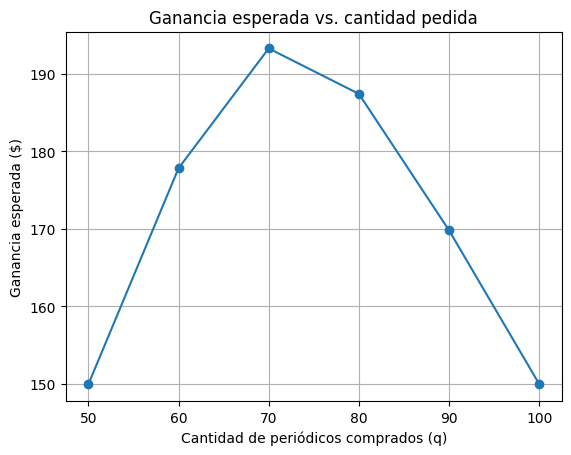

q =  50 → Ganancia esperada ≈ 149.93
q =  60 → Ganancia esperada ≈ 177.81
q =  70 → Ganancia esperada ≈ 193.27
q =  80 → Ganancia esperada ≈ 187.41
q =  90 → Ganancia esperada ≈ 169.80
q = 100 → Ganancia esperada ≈ 149.97

Nivel óptimo de pedido q* = 70, con ganancia esperada ≈ 193.27
Probabilidad de que la ganancia sea menor que $116: 0.0110


In [27]:
##Problema 20

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Parámetros
mu = 70
precios = {'venta': 10, 'costo': 7, 'reintegro': 5}
N = 100000  # simulaciones

# Función para calcular ganancia
def ganancia(q, D):
    vendidos = np.minimum(q, D)
    sobrantes = np.maximum(q - D, 0)
    return precios['venta'] * vendidos + precios['reintegro'] * sobrantes - precios['costo'] * q

# a) Ganancia esperada para varios niveles de pedido
niveles = np.arange(50, 105, 10)
ganancia_esperada = []

D = np.random.poisson(mu, N)

for q in niveles:
    g = ganancia(q, D)
    ganancia_esperada.append(g.mean())

plt.plot(niveles, ganancia_esperada, marker='o')
plt.xlabel("Cantidad de periódicos comprados (q)")
plt.ylabel("Ganancia esperada ($)")
plt.title("Ganancia esperada vs. cantidad pedida")
plt.grid(True)
plt.show()

for q, g in zip(niveles, ganancia_esperada):
    print(f"q = {q:3d} → Ganancia esperada ≈ {g:.2f}")

# b) Nivel óptimo
q_opt = niveles[np.argmax(ganancia_esperada)]
g_opt = max(ganancia_esperada)
print(f"\nNivel óptimo de pedido q* = {q_opt}, con ganancia esperada ≈ {g_opt:.2f}")

# c) Probabilidad de que G < 116 cuando q=70
G70 = ganancia(70, D)
prob = np.mean(G70 < 116)
print(f"Probabilidad de que la ganancia sea menor que $116: {prob:.4f}")


In [28]:
##Problema 21

import numpy as np
from scipy.stats import beta, norm

np.random.seed(42)

N = 1_000_000          # número de simulaciones
a, b = 2, 2            # parámetros Beta(2,2)

# Simulación de X ~ Beta(2,2)
X = np.random.beta(a, b, size=N)

# Estimación de E[sqrt(X)]
g = np.sqrt(X)
est = g.mean()

# IC 90% (normal asintótico)
s = g.std(ddof=1)
z = norm.ppf(0.95)
ic = (est - z*s/np.sqrt(N), est + z*s/np.sqrt(N))

print(f"Estimación E[√X] ≈ {est:.6f}")
print(f"IC 90%: ({ic[0]:.6f}, {ic[1]:.6f})")

# (Opcional) valor teórico para comparación:
# E[X^r] = B(a+r,b)/B(a,b). Con r=1/2, a=b=2.
from math import gamma, sqrt, pi
teor = gamma(a+0.5)*gamma(a+b)/(gamma(a)*gamma(a+b+0.5))
print(f"Valor teórico ≈ {teor:.6f}")  # ≈ 0.6857

Estimación E[√X] ≈ 0.685841
IC 90%: (0.685557, 0.686124)
Valor teórico ≈ 0.685714
